In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your datasets (adjust paths as needed)
df_cover = pd.read_csv('../data/processed_data/CREMP_Pcover_2023_StonyCoralSpecies.csv')
df_octocoral = pd.read_csv('../data/processed_data/CREMP_OCTO_Summaries_2023_Density.csv')

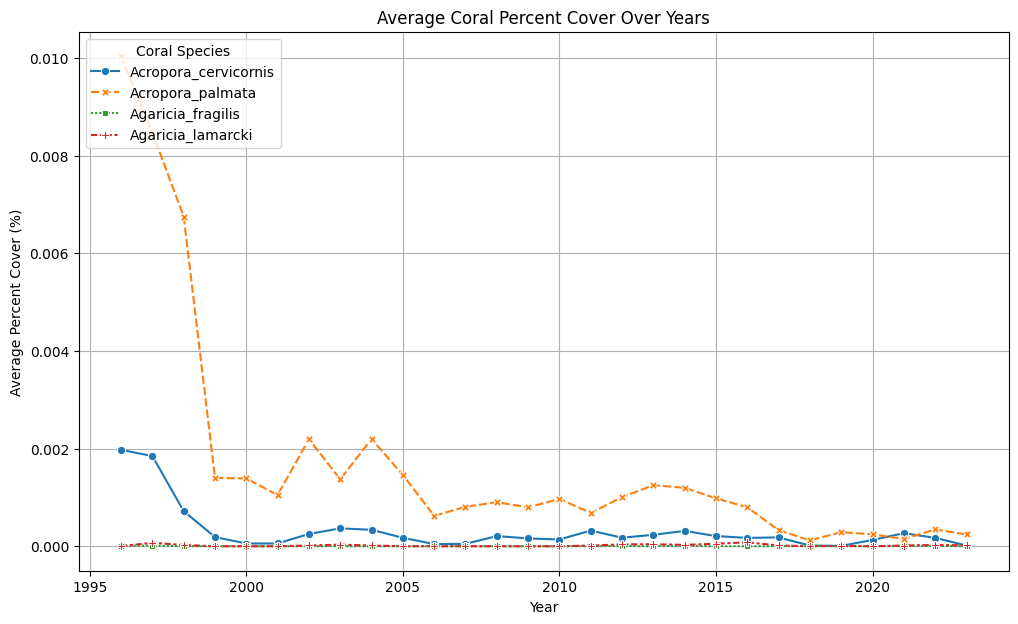

In [11]:
# ---- Plotting Coral Percent Cover ----
# Grouping by Year and calculating the average percent cover for each year
df_cover_yearly = df_cover.groupby('Year')[[
    'Acropora_cervicornis', 
    'Acropora_palmata', 
    'Agaricia_fragilis', 
    'Agaricia_lamarcki',  # Add more species if necessary
]].mean()

# Plot
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_cover_yearly, palette="tab10", markers=True)
plt.title('Average Coral Percent Cover Over Years')
plt.xlabel('Year')
plt.ylabel('Average Percent Cover (%)')
plt.legend(title='Coral Species', loc='upper left')
plt.grid(True)
plt.savefig('../more_plots/average_coral_percent_cover_over_years.png')
plt.show()


C:\Users\Elite\AppData\Local\Temp\ipykernel_3484\2490536653.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_species_richness = df_cover.groupby('Year').apply(lambda x: x[[


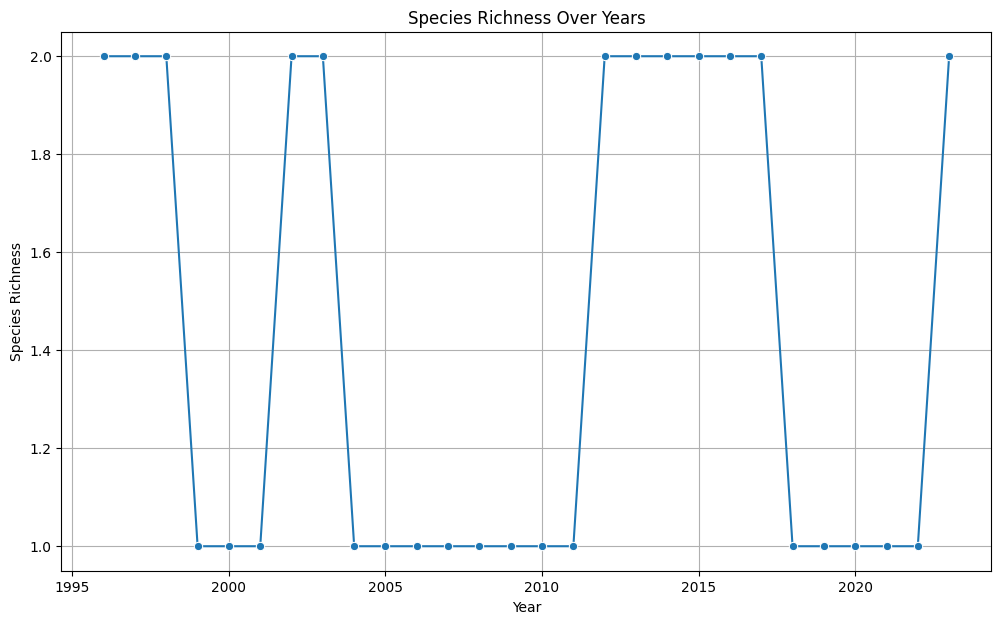

In [13]:
# ---- Plotting Species Richness Over Years ----
# Group by year and count unique species per year
df_species_richness = df_cover.groupby('Year').apply(lambda x: x[[
    'Acropora_cervicornis', 
    'Acropora_palmata', 
    'Agaricia_fragilis', 
    'Agaricia_lamarcki',  # Add more species if necessary
]].gt(0).sum(axis=1).max())

# Plot
plt.figure(figsize=(12, 7))
sns.lineplot(x=df_species_richness.index, y=df_species_richness.values, marker='o')
plt.title('Species Richness Over Years')
plt.xlabel('Year')
plt.ylabel('Species Richness')
plt.grid(True)
plt.savefig('../more_plots/species_richness_over_years.png')
plt.show()


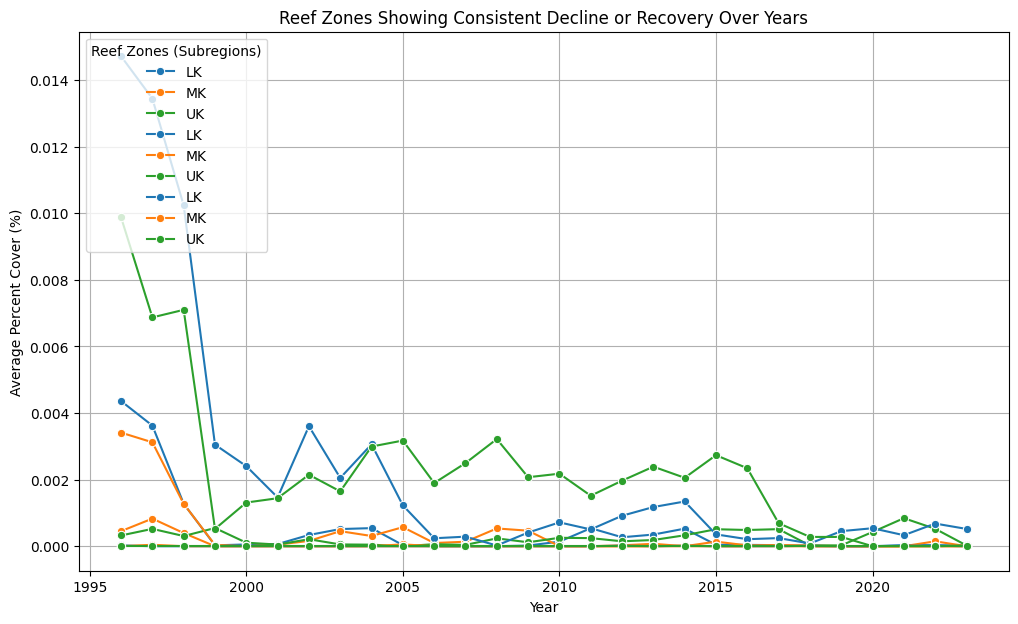

In [ ]:
# Spot reef zones showing consistent decline or recovery

# Group by Year and Subregion, calculating the average percent cover for each
df_subregion_trends = df_cover.groupby(['Year', 'Subregion'])[['Acropora_cervicornis', 'Acropora_palmata', 'Agaricia_fragilis']].mean()

# Resetting index to make Year and Subregion regular columns
df_subregion_trends.reset_index(inplace=True)

# Plotting
plt.figure(figsize=(12, 7))
sns.lineplot(data=df_subregion_trends, x='Year', y='Acropora_cervicornis', hue='Subregion', marker='o')
sns.lineplot(data=df_subregion_trends, x='Year', y='Acropora_palmata', hue='Subregion', marker='o')
sns.lineplot(data=df_subregion_trends, x='Year', y='Agaricia_fragilis', hue='Subregion', marker='o')

plt.title('Reef Zones Showing Consistent Decline or Recovery Over Years')
plt.xlabel('Year')
plt.ylabel('Average Percent Cover (%)')
plt.legend(title='Reef Zones (Subregions)', loc='upper left')
plt.grid(True)
plt.savefig('../more_plots/reef_zones_decline_or_recovery.png')
plt.show()
